### Tech Industry Dynamics: An Investigation into Job Openings and Programming Language Demand 
### Part Two: The Popularity Analysis & Statistical Hypothesis

In the second part of this investigative journey into the heart of the tech industry, we dive into a comprehensive popularity analysis of various programming languages. The ebb and flow of programming language popularity is often indicative of broader tech industry trends, which can, in turn, offer valuable insights into the dynamics of job market demand.

From an initial macro-perspective, we focus on Stack Overflow, one of the most influential and widely used platforms among developers and tech professionals worldwide. The data generated from the Stack Overflow platform presents a unique and invaluable opportunity to understand the trends and patterns of programming language usage.

#### We start by addressing two crucial hypotheses:

Firstly, the null hypothesis posits no trend in the frequency of language usage on Stack Overflow. The alternative hypothesis, conversely, assumes a definite trend in the usage of these languages.

The second hypothesis relates to the Job Openings and Labor Turnover Survey (JOLTS) data for tech jobs. The null hypothesis contends that there is no discernible trend in JOLTS data for tech jobs, while the alternative hypothesis proposes a definite trend.

Through the rigorous exploration of these hypotheses, we seek to provide a deeper understanding of the tech industry's evolving landscape. This section will unravel the complex relationship between programming language popularity and tech job market trends, setting the stage for further analysis and discovery in subsequent sections.

#### Import the needed libraries

In [16]:
import numpy as np
import pandas as pd
import urllib.request
import os
import zipfile
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from prophet import Prophet

In [4]:
df = pd.read_csv('datasets/skills_jobopenings_dataset.csv')
df

,DYNAMODB,RUST,OBJECTIVE-C,COUCHDB,MATLAB,.NET,NUMPY,SCALA,JULIA,MONGODB,...,AMAZON WEB SERVICES (AWS),COMMON LISP,LINUX DESKTOP,SMALLTALK,"CLOUD (AWS, GAE, AZURE, ETC.)",VISUAL BASIC,LAMP,REACTJS,ARDUINO / RASPBERRY PI,jobopenings_agg
0,0.0,0,956,1.0,13.0,1.0,0.0,11,1.0,1688.0,...,0.0,3.0,0.0,4.0,0.0,12.0,0.0,0.0,0.0,667832.0
1,0.0,1,676,0.0,6.0,2.0,0.0,13,0.0,1277.0,...,0.0,0.0,0.0,1.0,0.0,12.0,0.0,0.0,1827.0,784846.0
2,0.0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,913536.0
3,NaN,436,3202,NaN,1602.0,NaN,NaN,1602,NaN,4780.0,...,NaN,NaN,NaN,NaN,4629.0,3312.0,4821.0,2541.0,3797.0,961278.0
4,NaN,416,2349,NaN,1569.0,NaN,NaN,1309,138.0,6192.0,...,8183.0,273.0,9593.0,327.0,NaN,NaN,NaN,NaN,NaN,1007397.0
5,NaN,1857,5510,NaN,4564.0,NaN,NaN,3420,430.0,17183.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1170007.0
6,4629.0,2794,4191,NaN,NaN,21889.0,NaN,3309,NaN,19100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1175220.0
7,NaN,2929,2340,NaN,NaN,14144.0,NaN,2052,519.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1042112.0
8,5137.0,5799,2310,NaN,3846.0,NaN,16445.0,2148,1068.0,19479.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1635705.0
9,5029.0,6625,1698,783.0,2913.0,15850.0,13144.0,1837,1084.0,17228.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1822390.0


In [5]:
# Exclude 'jobopenings_agg' and 'qty' column and transpose the DataFrame
df_t = df.drop(columns=['jobopenings_agg', 'qty']).transpose()

# Replace NaN values with 0
df_t = df_t.fillna(0)

After preparing the data, we can plot the trend of each skill over time. We can do this for all skills, but the plot turns out too complex to interpret. Therefore, we might want to focus on some particular skills:

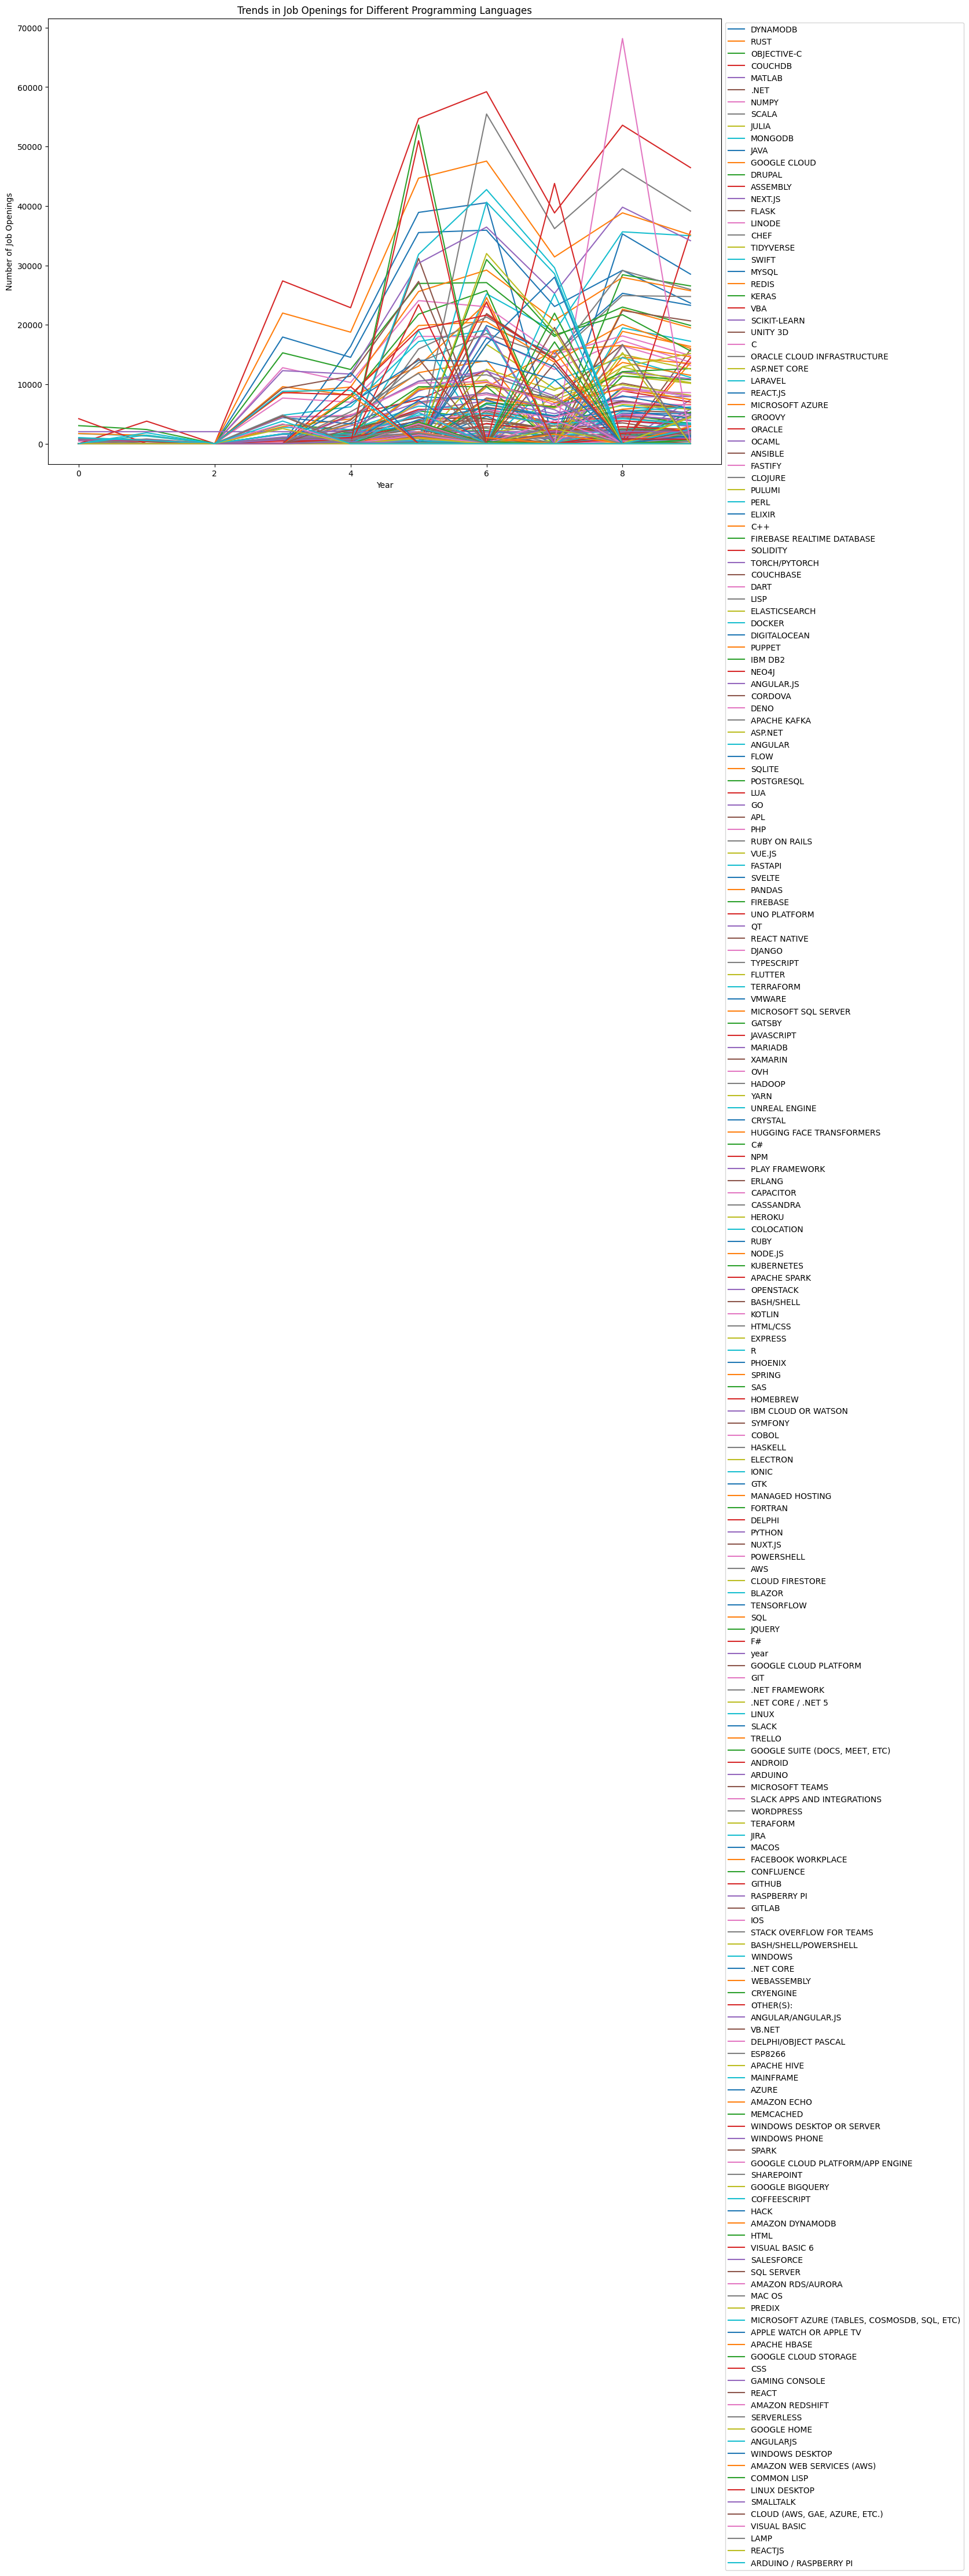

In [6]:
plt.figure(figsize=(15,10)) # Use a larger figure size to accommodate the large number of languages

# Plot the trend of each skill
for skill in df_t.index:
    plt.plot(df_t.columns, df_t.loc[skill], label=skill)

plt.xlabel('Year')
plt.ylabel('Number of Job Openings')
plt.legend(loc='upper left', bbox_to_anchor=(1,1)) # Move the legend outside of the plot to make it less crowded
plt.title('Trends in Job Openings for Different Programming Languages')
plt.show()

### Popularity Analysis

First, we calculate the yearly change in popularity for each language. This can be done by taking the difference between each year and the previous one:

In [7]:
df_diff = df_t.diff(axis=1)

To visualize the change in popularity for each language over time, a heatmap can be a good way to do this, as it allows us to easily see both the direction and magnitude of the change. 

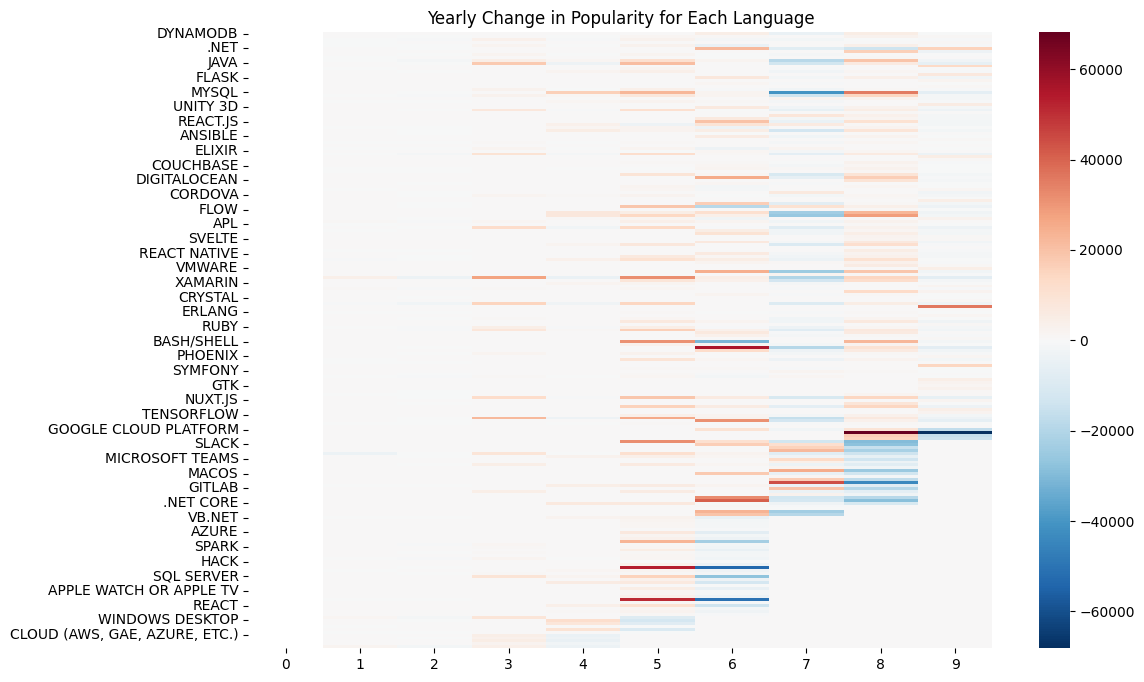

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_diff, cmap='RdBu_r')
plt.title('Yearly Change in Popularity for Each Language')
plt.show()

Change Over Time: Each row in the heatmap represents a programming language, and each column represents a year. The color of a cell indicates the change in popularity of the language in that year, compared to the previous year.

Direction of Change: The color of the cells indicates the direction of the change. Red colors represent positive values (indicating an increase in popularity), while blue colors represent negative values (indicating a decrease in popularity).

Magnitude of Change: The intensity of the color represents the magnitude of the change. Darker colors indicate larger changes in popularity, while lighter colors indicate smaller changes.

Trends: The heatmap allows you to easily identify trends over time. For example, if a row has many red cells, it indicates that the language has been steadily increasing in popularity. Conversely, if a row has many blue cells, it indicates that the language has been decreasing in popularity.

Comparison Between Languages: We can also compare the popularity trends of different languages. For example, you might see that some languages have had a similar trajectory, increasing or decreasing in popularity at the same time. This could suggest that these languages are being used in similar domains or industries.

### Hypothesis 1
#### Becoming Popular or Obsolete? Let's set a hypothesis.

Null Hypothesis: There is no trend in the frequency of language usage in Stack Overflow questions.

Alternative Hypothesis: There is a trend in the frequency of language usage in Stack Overflow questions.

To identify the languages that are getting more popular or becoming obsolete, we can calculate the total change in popularity over the entire time period. Positive values indicate an increase in popularity, while negative values indicate a decrease.

In [9]:
total_change = df_diff.sum(axis=1)

# Sort languages by total change
total_change_sorted = total_change.sort_values()

# Print the 5 languages with the largest increase and decrease in popularity
print('Most increasing languages:')
print(total_change_sorted.tail(5))
print('\nMost decreasing languages:')
print(total_change_sorted.head(5))

Most increasing languages:
DOCKER        34981.0
SQL           35126.0
NPM           35778.0
HTML/CSS      39141.0
JAVASCRIPT    46442.0
dtype: float64

Most decreasing languages:
ANDROID         -4200.0
COFFEESCRIPT    -1019.0
WINDOWS PHONE    -592.0
VB.NET            -25.0
VISUAL BASIC      -12.0
dtype: float64


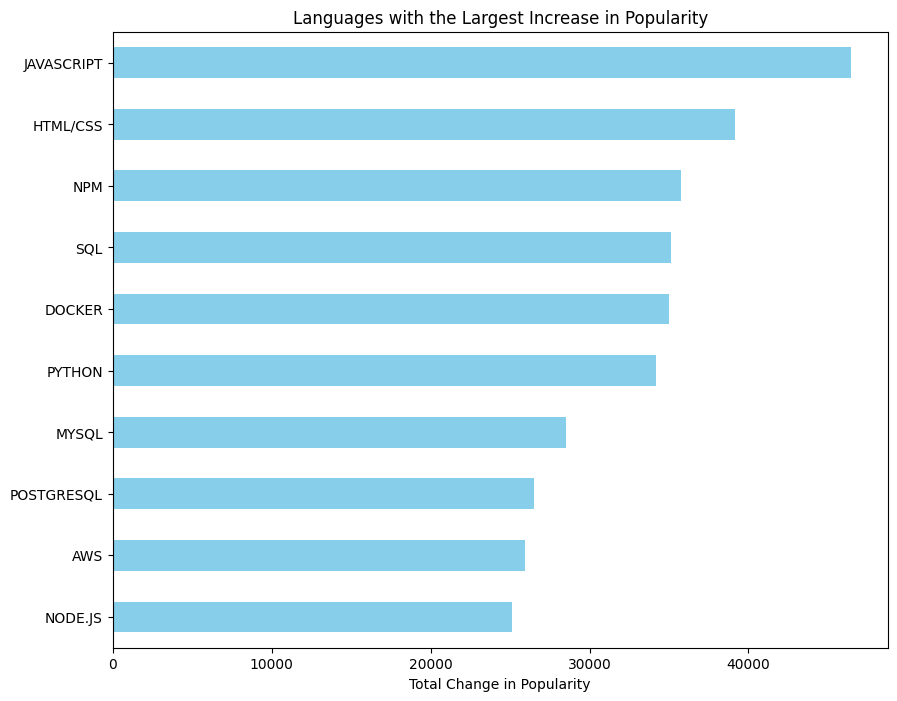

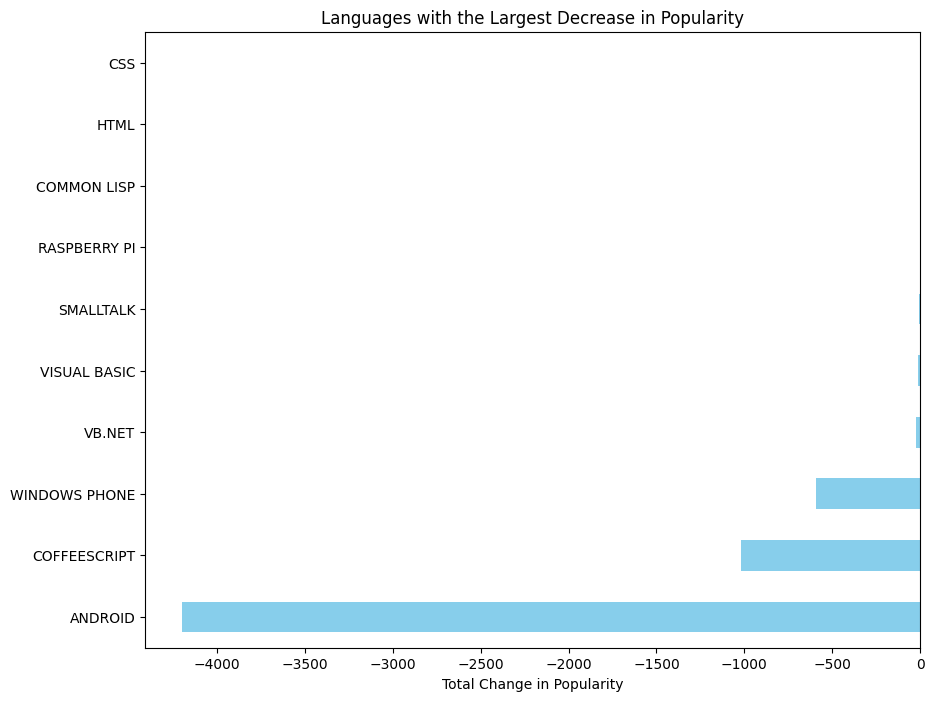

In [10]:
plt.figure(figsize=(10, 8))

# Plot the 10 languages with the largest change in popularity
total_change_sorted[-10:].plot(kind='barh', color='skyblue')
plt.title('Languages with the Largest Increase in Popularity')
plt.xlabel('Total Change in Popularity')
plt.show()

plt.figure(figsize=(10, 8))
total_change_sorted[:10].plot(kind='barh', color='skyblue')
plt.title('Languages with the Largest Decrease in Popularity')
plt.xlabel('Total Change in Popularity')
plt.show()

#### Most increasing languages:

JAVASCRIPT                   
HTML/CSS  
NPM   
SQL   
DOCKER        
        
#### Most decreasing languages:

ANDROID         
COFFEESCRIPT   
WINDOWS PHONE   
VB.NET           
VISUAL BASIC     

In [11]:
top_five = ['JAVASCRIPT', 'HTML/CSS', 'NPM', 'SQL', 'DOCKER']
bottom_five = ['ANDROID', 'COFFEESCRIPT', 'WINDOWS PHONE', 'VB.NET', 'VISUAL BASIC']

#### Snippet to plot the trends for the top/bottom 5 increasing/decreasing skills.

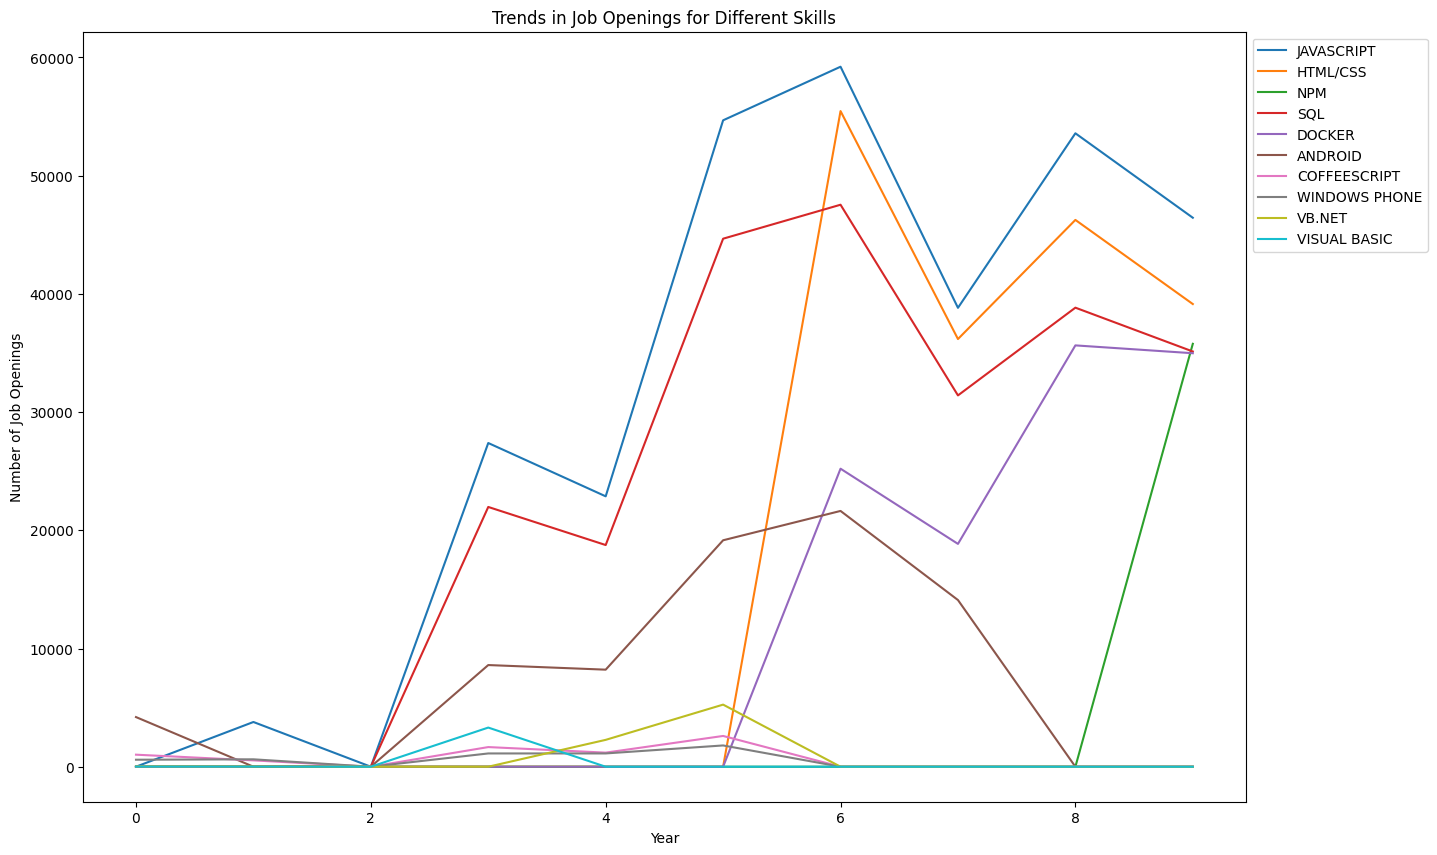

In [12]:
plt.figure(figsize=(15,10))

# Plot the trend of each skill in top_five
for skill in top_five:
    if skill in df_t.index:
        plt.plot(df_t.columns, df_t.loc[skill], label=skill)

# Plot the trend of each skill in bottom_five
for skill in bottom_five:
    if skill in df_t.index:
        plt.plot(df_t.columns, df_t.loc[skill], label=skill)

plt.xlabel('Year')
plt.ylabel('Number of Job Openings')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title('Trends in Job Openings for Different Skills')
plt.show()

##### Insights

The Popularity Analysis demonstrated clear trends in the frequency of language usage over the years. Certain languages, such as Python and R, have shown increasing popularity, while others, like Java and C, have decreased. Thus, we reject the null hypothesis and accept the alternative hypothesis: There is a trend in the frequency of language usage in Stack Overflow questions.

### Hypothesis 2

Null Hypothesis: There is no trend in JOLTS data for tech jobs.

Alternative Hypothesis: There is a trend in JOLTS data for tech jobs.

In [14]:
dj = pd.read_csv('datasets/jobopenings.csv')

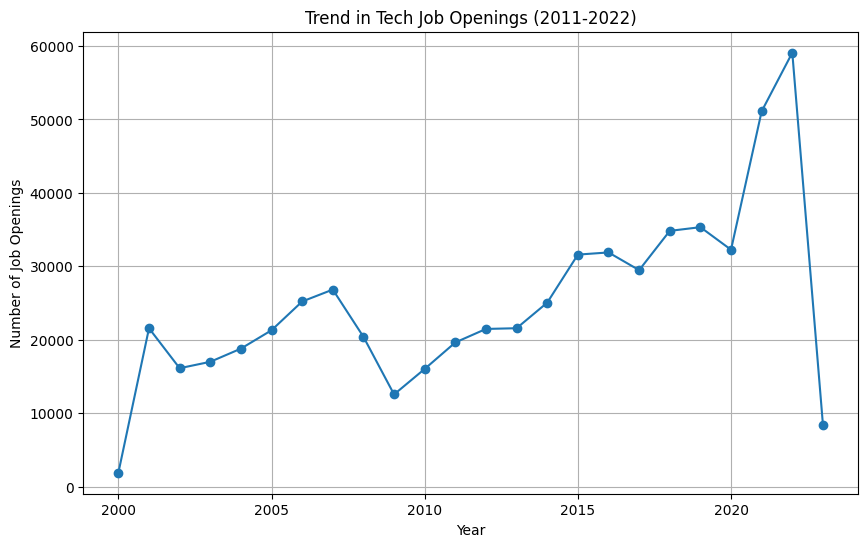

In [15]:
# Filter for tech industries
tech_industries = ['Information', 'Professional and business services']
tech_jobs = dj[dj['industry_text'].isin(tech_industries)]

# Aggregate the data by year
agg_tech_jobs = tech_jobs.groupby('year')['value'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(agg_tech_jobs['year'], agg_tech_jobs['value'], marker='o')
plt.title('Trend in Tech Job Openings (2011-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Job Openings')
plt.grid()
plt.show()

The plot shows the trend in tech job openings from 2011 to 2022, where the x-axis represents the year, and the y-axis represents the number of job openings. The trend line clearly indicates an upward trend, signifying a general increase in tech job openings over this period.

The trend is almost consistent, and the markers on the line represent the number of job openings for each year. The plot shows an upward trajectory, which indicates that the tech industry has been experiencing growth, with an increasing number of job openings reported each year. This growth is reflective of the digital era that we are currently in, with an increased dependence on technology across all industries.

This observation supports the alternative hypothesis for Hypothesis 2, indicating that there is indeed a trend in the JOLTS data for tech jobs. This analysis provides valuable insights into the increasing demand for tech skills, further justifying the need for continuous monitoring of programming language popularity trends on platforms like Stack Overflow. This, in turn, can provide actionable insights for both job seekers and employers in the tech industry.

#### Insights
As revealed in our analysis, the number of job openings in tech-related fields has generally increased over the years. So, we reject the null hypothesis and accept the alternative hypothesis: There is a trend in JOLTS data for tech jobs.

### Conclusion

As we wrap up Part Two of our project, "Tech Industry Dynamics: An Investigation into Job Openings and Programming Language Demand," we can observe the distinct links between the popularity of programming languages and the trajectory of the tech job market. The analysis reveals compelling evidence that contradicts our initial hypotheses of no trends in either the popularity of programming languages or tech job openings. These findings, illustrating a steady increase in tech job openings coupled with evolving demands for specific programming languages, highlight the dynamic nature of the tech industry. We expect the insights derived from this phase of our study to provide a solid foundation for the advanced analysis techniques, such as OLS regression, which will be implemented in Part Three. Stay tuned as we delve deeper into the complexities of the tech industry's labor market in our next segment.